In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from os import listdir
from os.path import isfile, join

# Make helper functions to extract excel data and plot impedance

In [2]:
def get_files(prefix):
    mypath = os.getcwd() + "/" + prefix
    list_of_files = [prefix + "/" + f for f in listdir(mypath) if isfile(join(mypath, f))]
    return np.sort(list_of_files)

def make_excel_array(fname, show_data=False):
    pandas = pd.read_excel(fname)
    full_array = np.array(pandas).T
    
    # show contents of excel file
    if show_data:
        print(pandas)
    
    # index 1: frequency (Hz)  
    # index 4: Z(omega) = magnitude of impedance
    # index 5 = phase!
    
    return [full_array[1], full_array[4], full_array[5]]

In [3]:
files = []
files.append(get_files("timepoint0"))
files.append(get_files("timepoint1"))
files.append(get_files("timepoint2"))
files.append(get_files("timepoint3"))
files.append(get_files("timepoint4"))

Text(0.5, 1.0, '')

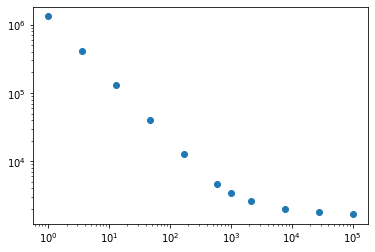

In [4]:
fs, z, phase = make_excel_array(files[0][0])

plt.plot(fs, z, "o")
plt.yscale('log')
plt.xscale('log')
plt.title("")

## Figure for ~all~ Gold and Silver Data

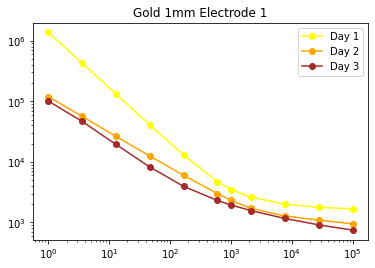

In [5]:
# Gold 1mm Across Time Points
gold_files = ["gold-1mm-electrode-1","gold-1mm-electrode-3","gold-2mm-electrode-6", "gold-2mm-electrode-7"]

# Gold 1mm Electrode 1
impedances_timepoints = []

for i in range(5): # iterate across time points
    fnames = files[i]
    impedances = []
    for f in fnames: 
        if gold_files[0] in f: # specify electrode of interest
            fs, z, phase = make_excel_array(f)
            impedances.append(z)
    impedances_timepoints.append(impedances)

mean_data = np.mean(impedances_timepoints,axis=1)
std_data = np.std(impedances_timepoints,axis=1)

plt.plot(fs, mean_data[0], marker = "o", color="yellow", label="Day 1")
plt.plot(fs, mean_data[2], marker = "o", color="orange", label="Day 2")
plt.plot(fs, mean_data[4], marker = "o", color="brown", label="Day 3")

plt.yscale('log')
plt.xscale('log')
plt.title("Gold 1mm Electrode 1")
plt.legend()
plt.show()

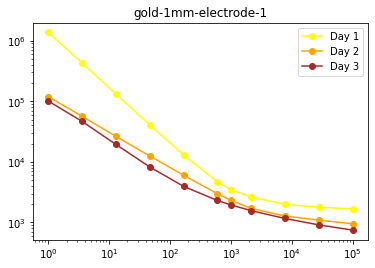

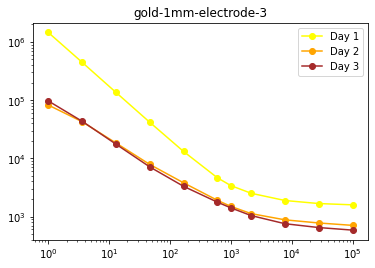

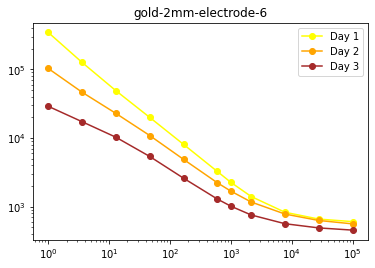

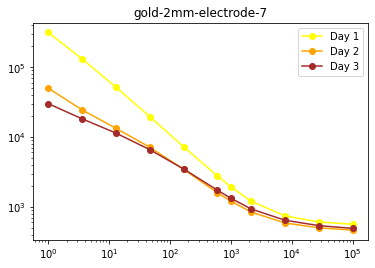

In [6]:
# Make Subfigure for All Gold Electrodes

gold_files = ["gold-1mm-electrode-1","gold-1mm-electrode-3","gold-2mm-electrode-6", "gold-2mm-electrode-7"]

# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
# axes = [ax1,ax2,ax3,ax4]

gold_data_all = []

for gold_num in range(4):
    impedances_timepoints = []

    for i in range(5): # iterate across time points
        fnames = files[i]
        impedances = []
        for f in fnames: 
            if gold_files[gold_num] in f: # specify electrode of interest
                fs, z, phase = make_excel_array(f)
                impedances.append(z)
        impedances_timepoints.append(impedances)
        
    gold_data_all.append(impedances_timepoints)
    mean_data = np.mean(impedances_timepoints,axis=1)
    std_data = np.std(impedances_timepoints,axis=1)

#     axes[gold_num].plot(fs, mean_data[0], marker = "o", color="yellow", label="Day 1")
#     axes[gold_num].plot(fs, mean_data[2], marker = "o", color="orange", label="Day 2")
#     axes[gold_num].plot(fs, mean_data[4], marker = "o", color="brown", label="Day 3")

    plt.plot(fs, mean_data[0], marker = "o", color="yellow", label="Day 1")
    plt.plot(fs, mean_data[2], marker = "o", color="orange", label="Day 2")
    plt.plot(fs, mean_data[4], marker = "o", color="brown", label="Day 3")

    plt.yscale('log')
    plt.xscale('log')
    plt.legend()

    plt.title(gold_files[gold_num])
    plt.show()

## Silver Data!!

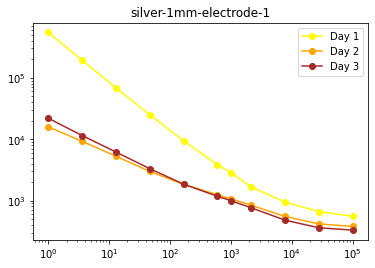

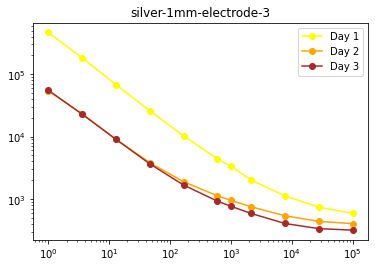

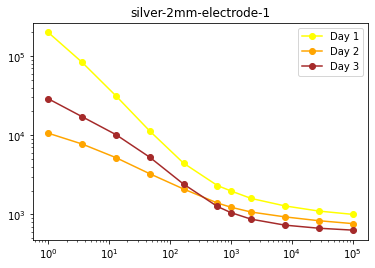

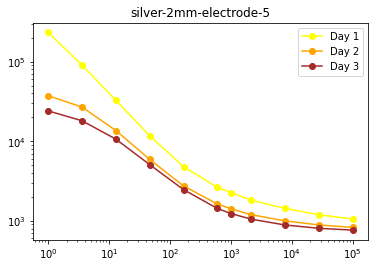

In [7]:
# Make Subfigure for All Silver Electrodes

silver_files = ["silver-1mm-electrode-1","silver-1mm-electrode-3","silver-2mm-electrode-1", "silver-2mm-electrode-5"]
silver_data_all = []

for silver_num in range(4):
    impedances_timepoints = []

    for i in range(5): # iterate across time points
        fnames = files[i]
        impedances = []
        for f in fnames: 
            if silver_files[silver_num] in f: # specify electrode of interest
                fs, z, phase = make_excel_array(f)
                impedances.append(z)
        impedances_timepoints.append(impedances)

    silver_data_all.append(impedances_timepoints)
    mean_data = np.mean(impedances_timepoints,axis=1)
    std_data = np.std(impedances_timepoints,axis=1)

    plt.plot(fs, mean_data[0], marker = "o", color="yellow", label="Day 1")
    plt.plot(fs, mean_data[2], marker = "o", color="orange", label="Day 2")
    plt.plot(fs, mean_data[4], marker = "o", color="brown", label="Day 3")

    plt.yscale('log')
    plt.xscale('log')
    plt.legend()

    plt.title(silver_files[silver_num])
    plt.show()

## Combines Electrodes - Plot Error Bars

Original Data Shape: (electrode, timepoint, sample, fs)  (2, 5, 2, 11)


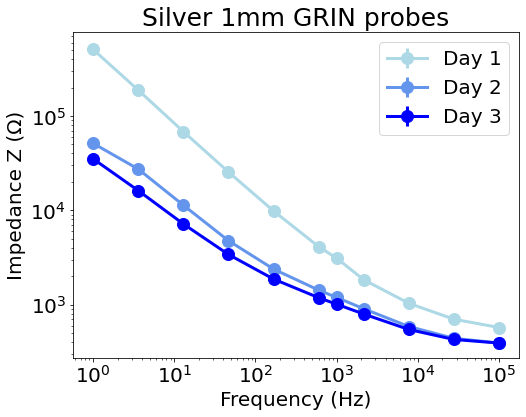

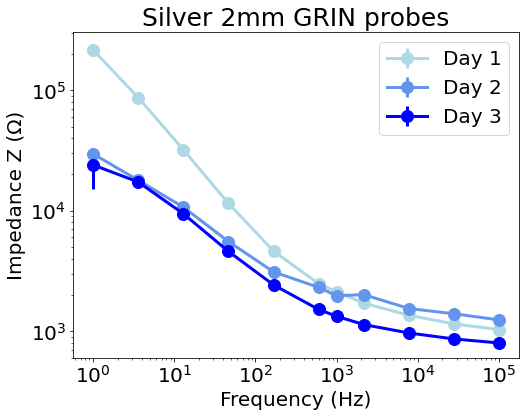

In [26]:
# Silver Data

plt.figure(figsize=(8,6))

data_1mm = silver_data_all[:2]
data_2mm = silver_data_all[2:]

# Silver 1mm
data = data_1mm
print("Original Data Shape: (electrode, timepoint, sample, fs) ", np.shape(data))
data_mean = np.mean(data, axis=0) # mean across electrodes
output = np.mean(data_mean, axis=1) # mean across repeated samples
output_sd = np.std(data_mean, axis=1) # std across repeated samples

plt.errorbar(fs, output[0], yerr=output_sd[0], fmt='o-', color="lightblue", label="Day 1",linewidth=3, markersize=12)
plt.errorbar(fs, output[1], yerr=output_sd[1], fmt='o-', color="cornflowerblue", label="Day 2",linewidth=3, markersize=12)
plt.errorbar(fs, output[2], yerr=output_sd[2], fmt='o-', color="blue", label="Day 3",linewidth=3, markersize=12)

plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title("Silver 1mm GRIN probes",fontsize=25)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance Z (Ω)")
plt.show()

plt.figure(figsize=(8,6))


# Silver 2mm
data = data_2mm
data_mean = np.mean(data, axis=0) # mean across electrodes
output = np.mean(data_mean, axis=1) # mean across repeated samples
output_sd = np.std(data_mean, axis=1) # std across repeated samples

plt.errorbar(fs, output[0], yerr=output_sd[0], fmt='o-', color="lightblue", label="Day 1",linewidth=3, markersize=12)
plt.errorbar(fs, output[1], yerr=output_sd[1], fmt='o-', color="cornflowerblue", label="Day 2",linewidth=3, markersize=12)
plt.errorbar(fs, output[2], yerr=output_sd[2], fmt='o-', color="blue", label="Day 3",linewidth=3, markersize=12)

plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title("Silver 2mm GRIN probes",fontsize=25)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance Z (Ω)")
plt.show()


# plt.plot(fs, output[0], marker = "o", color="yellow", label="Day 1")
# plt.plot(fs, output[2], marker = "o", color="orange", label="Day 2")
# plt.plot(fs, output[4], marker = "o", color="brown", label="Day 3")

Original Data Shape: (electrode, timepoint, sample, fs)  (2, 5, 2, 11)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


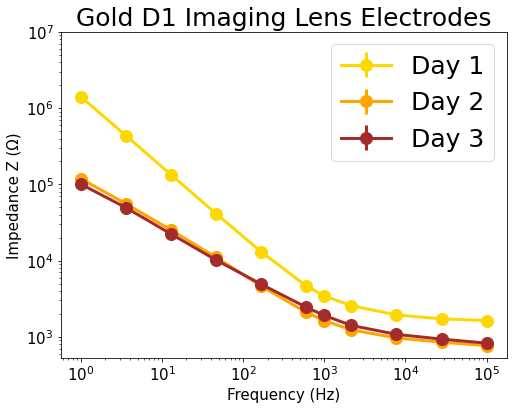

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


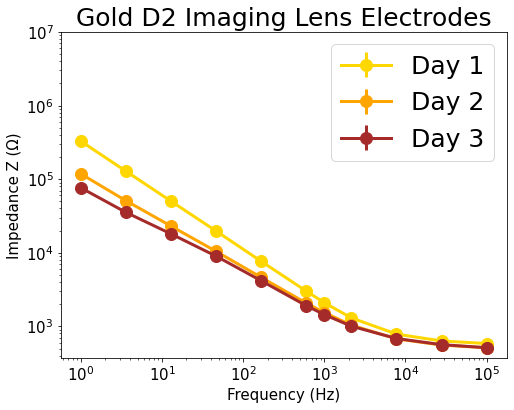

In [41]:
# Gold Data
plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(8,6))

data_1mm = gold_data_all[:2]
data_2mm = gold_data_all[2:]

# Silver 1mm
data = data_1mm
print("Original Data Shape: (electrode, timepoint, sample, fs) ", np.shape(data))
data_mean = np.mean(data, axis=0) # mean across electrodes
output = np.mean(data_mean, axis=1) # mean across repeated samples
output_sd = np.std(data_mean, axis=1) # std across repeated samples

# gold_1mm_output = np.mean(data_mean, axis=1) # mean across repeated samples
# gold_1mm_output_sd = np.std(data_mean, axis=1) # std across repeated samples

plt.errorbar(fs, output[0], yerr=output_sd[0], fmt='o-', color="gold", label="Day 1",linewidth=3, markersize=12)
plt.errorbar(fs, output[1], yerr=output_sd[1], fmt='o-', color="orange", label="Day 2",linewidth=3, markersize=12)
plt.errorbar(fs, output[2], yerr=output_sd[2], fmt='o-', color="brown", label="Day 3",linewidth=3, markersize=12)

plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=25)
plt.title("Gold D1 Imaging Lens Electrodes",fontsize=25)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance Z (Ω)")
plt.ylim([0,10000000])

plt.show()

plt.figure(figsize=(8,6))

# Silver 2mm
data = data_2mm
data_mean = np.mean(data, axis=0) # mean across electrodes
output = np.mean(data_mean, axis=1) # mean across repeated samples
output_sd = np.std(data_mean, axis=1) # std across repeated samples

# gold_2mm_output = np.mean(data_mean, axis=1) # mean across repeated samples
# gold_2mm_output_sd = np.std(data_mean, axis=1) # std across repeated samples

plt.errorbar(fs, output[0], yerr=output_sd[0], fmt='o-', color="gold", label="Day 1",linewidth=3, markersize=12)
plt.errorbar(fs, output[1], yerr=output_sd[1], fmt='o-', color="orange", label="Day 2",linewidth=3, markersize=12)
plt.errorbar(fs, output[2], yerr=output_sd[2], fmt='o-', color="brown", label="Day 3",linewidth=3, markersize=12)

plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=25)
plt.title("Gold D2 Imaging Lens Electrodes",fontsize=25)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance Z (Ω)")
plt.ylim([0,10000000])
plt.show()


# plt.plot(fs, output[0], marker = "o", color="yellow", label="Day 1")
# plt.plot(fs, output[2], marker = "o", color="orange", label="Day 2")
# plt.plot(fs, output[4], marker = "o", color="brown", label="Day 3")

## Plotting Impedance at 1kHz

In [10]:
print(np.shape(gold_data_all))
print(np.shape(silver_data_all))

gold_data = np.mean(gold_data_all,axis=2)
gold_z = []

for i in range(4):
    data = gold_data[i]
    z = data.T[np.where(fs == 1000)][0]
    
    z_crop = np.delete(z,1) # remove timepoint 1
    
    gold_z.append(z)
    
    
silver_data = np.mean(silver_data_all,axis=2)
silver_z = []

for i in range(4):
    data = silver_data[i]
    z = data.T[np.where(fs == 1000)][0]
    z_crop = np.delete(z,1) # remove timepoint 1
    
    silver_z.append(z)
    
    
print(np.shape(gold_z))
print(np.shape(silver_z))


(4, 5, 2, 11)
(4, 5, 2, 11)
(4, 5)
(4, 5)


In [11]:
silver_z[2][0]

1975.6484049229043

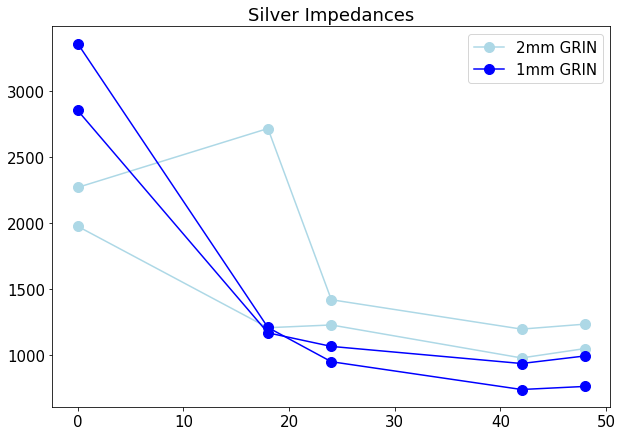

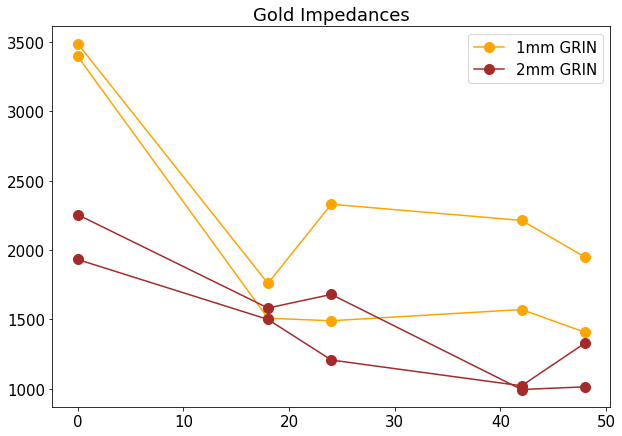

In [12]:
timepoints = [0,1,2,3,4]
time_hours = [0,18,24,42,48]

# timepoints = [0,1,2,3]
# time_hours = [0,24,42,48]

# plot silver
plt.figure(figsize=(10,7))
mylabel = "2mm GRIN"
for i in [2,3]:
    plt.plot(time_hours, silver_z[i],marker="o", color="lightblue", label=mylabel,markersize=10)
    mylabel = "_nolegend_"
mylabel = "1mm GRIN"
for i in [0,1]:
    plt.plot(time_hours, silver_z[i],marker="o", color="blue", label=mylabel,markersize=10)
    mylabel = "_nolegend_"


plt.title("Silver Impedances")
plt.legend()
plt.show()

# plot gold
plt.figure(figsize=(10,7))
mylabel = "1mm GRIN"
for i in [0,1]:
    plt.plot(time_hours, gold_z[i],marker="o", color="orange", label=mylabel,markersize=10)
    mylabel = "_nolegend_"
mylabel = "2mm GRIN"
for i in [2,3]:
    plt.plot(time_hours, gold_z[i],marker="o", color="brown", label=mylabel,markersize=10)
    mylabel = "_nolegend_"

plt.title("Gold Impedances")
plt.legend()
plt.show()

## Average by GRIN size

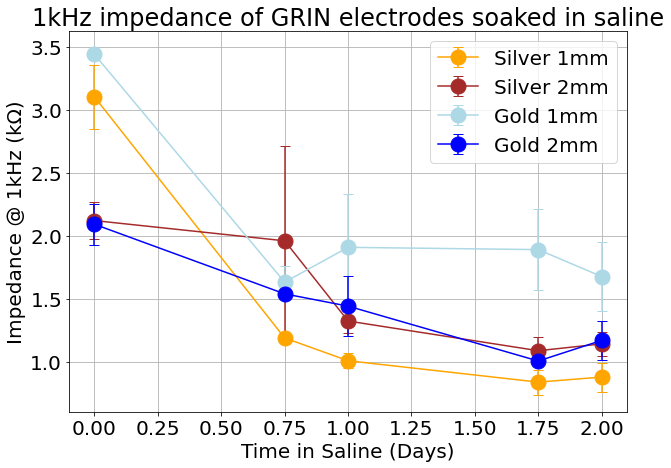

In [13]:
time_hours = [0,18,24,42,48]
time_days = np.array([0,18,24,42,48])/24
time = time_days

plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 20})

# Silver

# 1mm
plt.errorbar(time, np.mean(silver_z[:2],axis=0)/1000, yerr=np.std(silver_z[:2],axis=0)/1000, 
          fmt="o-", color="orange", label="Silver 1mm", capsize=5, markersize=15)

# 2mm
plt.errorbar(time, np.mean(silver_z[2:],axis=0)/1000, yerr=np.std(silver_z[2:],axis=0)/1000, 
          fmt="o-", color="brown", label="Silver 2mm", capsize=5, markersize=15)

# Gold

# 1mm
plt.errorbar(time, np.mean(gold_z[:2],axis=0)/1000, yerr=np.std(gold_z[:2],axis=0)/1000, 
          fmt="o-", color="lightblue", label="Gold 1mm", capsize=5, markersize=15)

# 2mm
plt.errorbar(time, np.mean(gold_z[2:],axis=0)/1000, yerr=np.std(gold_z[2:],axis=0)/1000, 
          fmt="o-", color="blue", label="Gold 2mm", capsize=5, markersize=15)



plt.title("1kHz impedance of GRIN electrodes soaked in saline")
plt.legend()
plt.grid()
plt.xlabel("Time in Saline (Days)")
plt.ylabel("Impedance @ 1kHz (kΩ)")
plt.show()



In [14]:
np.shape(np.array(gold_z).T)

np.array(gold_z).T[0] - np.array(gold_z).T[-1]

array([1538.768449  , 1988.33418248, 1241.26807008,  602.65032802])

gold 1mm drop =  1.7635513157398182
gold 2mm drop =  0.9219591990477696
silver 1mm drop =  2.223727839871371
silver 2mm drop =  0.9788557303514971


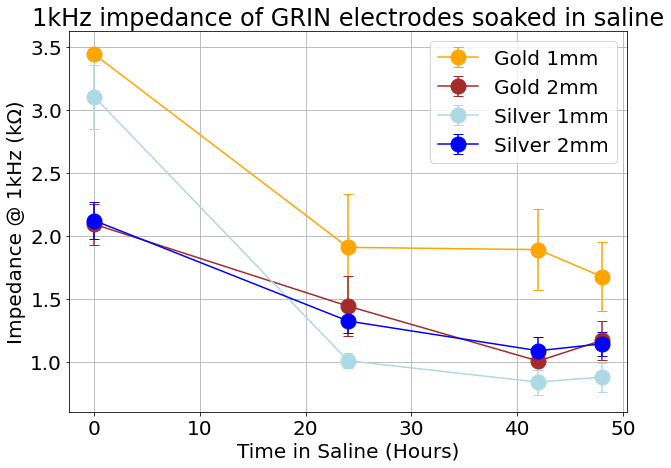

In [15]:
## Same plot but remove timepoint 1!!!

time_hours = [0,18,24,42,48]
time_days = np.array([0,18,24,42,48])
time = np.delete(time_days,1)

plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 20})


# Gold

# 1mm
y_vals = np.delete(np.mean(gold_z[:2],axis=0)/1000, 1)
err_vals = np.delete(np.std(gold_z[:2],axis=0)/1000, 1)

# delta_z = gold_z[]


print("gold 1mm drop = ", y_vals[0]-y_vals[-1])
plt.errorbar(time, y_vals, yerr=err_vals, 
          fmt="o-", color="orange", label="Gold 1mm", capsize=5, markersize=15)

# 2mm
y_vals = np.delete(np.mean(gold_z[2:],axis=0)/1000, 1)
err_vals = np.delete(np.std(gold_z[2:],axis=0)/1000, 1)
print("gold 2mm drop = ", y_vals[0]-y_vals[-1])


plt.errorbar(time, y_vals, yerr=err_vals, 
          fmt="o-", color="brown", label="Gold 2mm", capsize=5, markersize=15)


# Silver

# 1mm
y_vals = np.delete(np.mean(silver_z[:2],axis=0)/1000, 1)
err_vals = np.delete(np.std(silver_z[:2],axis=0)/1000, 1)
print("silver 1mm drop = ", y_vals[0]-y_vals[-1])


plt.errorbar(time, y_vals, yerr=err_vals, 
          fmt="o-", color="lightblue", label="Silver 1mm", capsize=5, markersize=15)

# 2mm
y_vals = np.delete(np.mean(silver_z[2:],axis=0)/1000, 1)
err_vals = np.delete(np.std(silver_z[2:],axis=0)/1000, 1)
print("silver 2mm drop = ", y_vals[0]-y_vals[-1])

plt.errorbar(time, y_vals, yerr=err_vals, 
          fmt="o-", color="blue", label="Silver 2mm", capsize=5, markersize=15)




plt.title("1kHz impedance of GRIN electrodes soaked in saline")
plt.legend()
plt.grid()
plt.xlabel("Time in Saline (Hours)")
plt.ylabel("Impedance @ 1kHz (kΩ)")
plt.show()



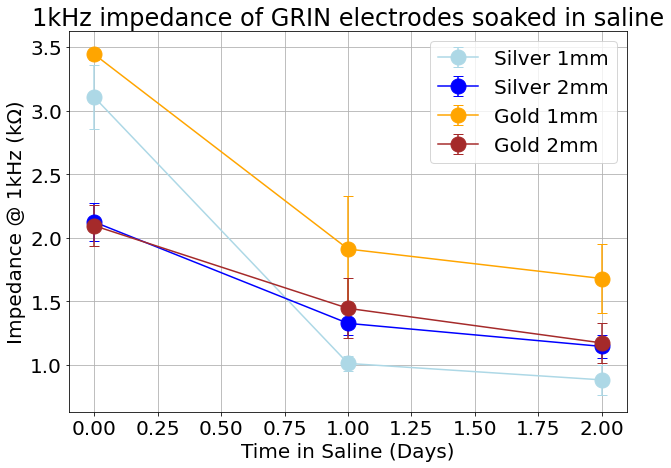

In [16]:
## Same plot but remove 2 timepoints!!!

time_hours = [0,18,24,42,48]
time_days = np.array([0,18,24,42,48])/24
time = np.delete(time_days,1)
time = np.delete(time,2)

plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 20})

# Silver

# 1mm
y_vals = np.delete(np.mean(silver_z[:2],axis=0)/1000, 1)
err_vals = np.delete(np.std(silver_z[:2],axis=0)/1000, 1)

y_vals = np.delete(y_vals, 2)
err_vals = np.delete(err_vals, 2)

plt.errorbar(time, y_vals, yerr=err_vals, 
          fmt="o-", color="lightblue", label="Silver 1mm", capsize=5, markersize=15)

# 2mm
y_vals = np.delete(np.mean(silver_z[2:],axis=0)/1000, 1)
err_vals = np.delete(np.std(silver_z[2:],axis=0)/1000, 1)

y_vals = np.delete(y_vals, 2)
err_vals = np.delete(err_vals, 2)

plt.errorbar(time, y_vals, yerr=err_vals, 
          fmt="o-", color="blue", label="Silver 2mm", capsize=5, markersize=15)


# Gold

# 1mm
y_vals = np.delete(np.mean(gold_z[:2],axis=0)/1000, 1)
err_vals = np.delete(np.std(gold_z[:2],axis=0)/1000, 1)

y_vals = np.delete(y_vals, 2)
err_vals = np.delete(err_vals, 2)

plt.errorbar(time, y_vals, yerr=err_vals, 
          fmt="o-", color="orange", label="Gold 1mm", capsize=5, markersize=15)

# 2mm
y_vals = np.delete(np.mean(gold_z[2:],axis=0)/1000, 1)
err_vals = np.delete(np.std(gold_z[2:],axis=0)/1000, 1)

y_vals = np.delete(y_vals, 2)
err_vals = np.delete(err_vals, 2)

plt.errorbar(time, y_vals, yerr=err_vals, 
          fmt="o-", color="brown", label="Gold 2mm", capsize=5, markersize=15)



plt.title("1kHz impedance of GRIN electrodes soaked in saline")
plt.legend()
plt.grid()
plt.xlabel("Time in Saline (Days)")
plt.ylabel("Impedance @ 1kHz (kΩ)")
plt.show()



In [17]:
np.shape(silver_z[:2])

(2, 5)

In [18]:
np.shape(silver_z[2:])

(2, 5)

In [19]:
silver_z[:2]

[array([2851.25104995, 1170.32155457, 1067.71080701,  938.42567453,
         995.53596295]),
 array([3356.90427806, 1210.83413065,  951.95101603,  741.89092164,
         765.16368531])]

In [20]:
silver_z[2:]

[array([1975.64840492, 1209.02261042, 1229.76215359,  980.51407708,
        1051.41201669]),
 array([2269.46861193, 2714.8569916 , 1420.57543862, 1198.44141739,
        1235.99353945])]

## Average Out 1kHz Z Impedances

In [21]:
np.shape(silver_z)

(4, 5)

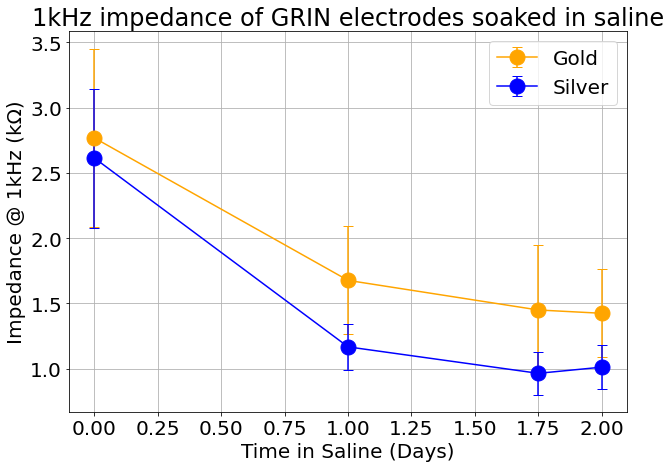

In [22]:
from matplotlib.ticker import FormatStrFormatter

# timepoints = [0,1,2,3,4]
time_hours = [0,18,24,42,48]
time_days = np.array([0,18,24,42,48])/24


# timepoints = [0,1,2,3]
# time_hours = [0,24,42,48]

silver_z_mean = np.mean(silver_z,axis=0)/1000
silver_z_std = np.std(silver_z,axis=0)/1000

gold_z_mean = np.mean(gold_z,axis=0)/1000
gold_z_std = np.std(gold_z,axis=0)/1000

# plt.plot(time_hours, silver_z_mean, marker="o", color="blue", label="Silver")
# plt.plot(time_hours, gold_z_mean, marker="o", color="gold", label="Gold")

# plt.plot(np.delete(time_hours,1), np.delete(silver_z_mean,1), marker="o", color="blue", label="Silver")
# plt.plot(np.delete(time_hours,1), np.delete(gold_z_mean,1), marker="o", color="gold", label="Gold")

# plt.errorbar(fs, output[0], yerr=output_sd[0], fmt='o-', color="yellow", label="Day 1")

time = time_days

plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 20})

plt.errorbar(np.delete(time,1), np.delete(gold_z_mean,1), yerr=np.delete(gold_z_std,1), 
          fmt="o-", color="orange", label="Gold", capsize=5, markersize=15)

plt.errorbar(np.delete(time,1), np.delete(silver_z_mean,1), yerr=np.delete(silver_z_std,1), 
          fmt="o-", color="blue", label="Silver", capsize=5, markersize=15)



plt.title("1kHz impedance of GRIN electrodes soaked in saline")
plt.legend()
plt.grid()

plt.xlabel("Time in Saline (Days)")
plt.ylabel("Impedance @ 1kHz (kΩ)")
plt.show()


In [23]:
np.shape(impedances_timepoints)

(5, 2, 11)

In [24]:
np.shape(np.mean(gold_data_all,axis=2)[0])

s = np.mean(gold_data_all,axis=2)[0]

print(np.shape(s))

np.shape(s.T[np.where(fs == 1000)])

s.T[np.where(fs == 1000)]

(5, 11)


array([[3487.96828896, 1759.80772171, 2329.99277803, 2213.36373357,
        1949.19983996]])

In [25]:
# Gold 2mm probe
print("gold 2mm ---")
for i in range(4):
    vals = make_excel_array(gold_files[i])
    print(gold_files[i])
    plt.plot(vals[0], vals[1],'ro',label="Gold 2mm")

print("gold 1mm ---")
# Gold 1mm probe
for i in [4,5,6,7,8,9,10]:
    vals = make_excel_array(gold_files[i])
    plt.plot(vals[0], vals[1],'bo', label="Gold 1mm")
    print(gold_files[i])
    
print("silver 2mm ---")
# Silver 2mm probe
for i in range(8):
    vals = make_excel_array(silver_files[i])
    print(silver_files[i])
    plt.plot(vals[0], vals[1],'go', label="Silver 2mm")
    
print("silver 1mm ---")
# Silver 1mm probe
for i in [9,10,11,12,13,14,15]:
    vals = make_excel_array(silver_files[i])
    print(silver_files[i])
    plt.plot(vals[0], vals[1],'co',label="Silver 1mm")
    
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance Z(Ω) [Ohms]")
plt.title("Gold 2mm Probe")
# plt.legend()
plt.show()

gold 2mm ---


FileNotFoundError: [Errno 2] No such file or directory: 'gold-1mm-electrode-1'

In [ ]:
# Averaging data
plt.figure(figsize=(15,12))
plt.rcParams.update({'font.size': 35})

# Gold 2mm probe
color = "red"
vals = []
for i in range(4):
    vals.append(make_excel_array(gold_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],'o', color=color, label="Gold 2mm",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)

# Gold 1mm probe

color = "blue"
vals = []
for i in [4,5,6,7,8,9,10]:
    vals.append(make_excel_array(gold_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],'o', color=color, label="Gold 1mm",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)

    
# # Silver 2mm probe
color = "green"
vals = []
for i in range(8):
    vals.append(make_excel_array(silver_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],'o', color=color, label="Silver 2mm",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)

    
# Silver 1mm probe
color = "cyan"
vals = []
for i in [9,10,11,12,13,14,15]:
    vals.append(make_excel_array(silver_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],'o', color=color, label="Silver 1mm",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)

    
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance Z(Ω) [Ohms]")
plt.title("Title")
plt.legend()
plt.show()

In [ ]:
# Averaging data
plt.figure(figsize=(15,12))
plt.rcParams.update({'font.size': 35})

# Gold 1mm probe

color = "sandybrown"
vals = []
for i in [4,5,6,7,8,9,10]:
    vals.append(make_excel_array(gold_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="1mm GRIN",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)


# Gold 2mm probe
color = "teal"
vals = []
for i in range(4):
    vals.append(make_excel_array(gold_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="2mm GRIN",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
print(np.where(avg[0] == 1000)[0][0])
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)


plt.yscale('log')
plt.xscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance Z(Ω) [Ohms]")
plt.title("Gold GRIN-Electrode Impedance")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Averaging data
plt.figure(figsize=(15,12))
plt.rcParams.update({'font.size': 35})
    
# Silver 1mm probe
color = "cornflowerblue"
vals = []
for i in [9,10,11,12,13,14,15]:
    vals.append(make_excel_array(silver_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="1mm GRIN",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)


# # Silver 2mm probe
color = "firebrick"
vals = []
for i in range(8):
    vals.append(make_excel_array(silver_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="2mm GRIN",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)

    
    
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance Z(Ω) [Ohms]")
plt.title("Silver GRIN-Electrode Impedance")
plt.legend()
plt.grid()
plt.show()

## JOINT FIGURE

In [ ]:
std[1][4]

In [ ]:
# Averaging data
plt.figure(figsize=(15,12))
plt.rcParams.update({'font.size': 25})

plt.axvline(x=1000, linestyle='dashed', color="black", linewidth=5, label="1kHz Freq")

# Gold 1mm probe

color = "sandybrown"
vals = []
for i in [4,5,6,7,8,9,10]:
    vals.append(make_excel_array(gold_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="1mm Gold",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)

print("gold 1mm impedance")
print(avg[0][4])
print(avg[1][4])
print(std[1][4])
print("n=", len([4,5,6,7,8,9,10]))


# Gold 2mm probe
color = "teal"
vals = []
for i in range(4):
    vals.append(make_excel_array(gold_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="2mm Gold",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
print(np.where(avg[0] == 1000)[0][0])
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)

print("gold 2mm impedance")
print(avg[0][4])
print(avg[1][4])
print(std[1][4])

    
# Silver 1mm probe
color = "cornflowerblue"
vals = []
for i in [9,10,11,12,13,14,15]:
    vals.append(make_excel_array(silver_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="1mm Silver",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)

print("silver 1mm impedance")
print(avg[0][4])
print(avg[1][4])
print(std[1][4])

# # Silver 2mm probe
color = "firebrick"
vals = []
for i in range(8):
    vals.append(make_excel_array(silver_files[i]))

avg = np.mean(vals,axis=0)
std = np.std(vals,axis=0)

np.shape(vals)
plt.plot(avg[0], avg[1],marker='o', color=color, label="2mm Silver",markersize=20)
plt.errorbar(avg[0], avg[1], std[1],color=color, capsize=5)
plt.plot(1000, avg[1][np.where(avg[0] == 1000)[0][0]], marker="*", color=color, markersize=50)

print("silver 2mm impedance")
print(avg[0][4])
print(avg[1][4])
print(std[1][4])

plt.yscale('log')
plt.xscale('log')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance Z(Ω) [Ohms]")
plt.title("GRIN-Electrode Impedance")
plt.legend()
plt.grid()
plt.show()

In [ ]:
## Plotting Various files at once

plot_electrodes(files[0:4])
format_log_plot()

In [ ]:
## Electrode numbers that I care about

silver_fn_2mm = np.array(["probe-3-electrode-1", "probe-3-electrode-3", "probe-3-electrode-5", "probe-3-electrode-7"])
silver_fn_1mm = np.array(["probe-4-electrode-1", "probe-4-electrode-2", "probe-4-electrode-3", "probe-4-electrode-4"])

gold_fn_2mm = np.array(["probe-1-electrode-6", "probe-1-electrode-7"])
gold_fn_1mm = np.array(["probe-2-electrode-1", "probe-2-electrode-2", "probe-2-electrode-3"])


# Silver

# probe-3-electrode-1
# probe-3-electrode-3
# probe-3-electrode-5
# probe-3-electrode-7

# probe-4-electrode-1
# probe-4-electrode-2
# probe-4-electrode-3
# probe-4-electrode-4

# Gold
# probe-1-electrode-6
# probe-1-electrode-7

# probe-2-electrode-1
# probe-2-electrode-2
# probe-2-electrode-3

In [ ]:
def average_impedance_data(a, color="blue", label=""):
    # input is data

    unique = np.unique(a[0])
    averaged = np.zeros((3,len(unique)))

    for i in range(len(unique)):
        averaged[0][i] = unique[i]
        averaged[1][i] = np.mean(a[1][np.where(a[0] == unique[i])])
        averaged[2][i] = np.std(a[1][np.where(a[0] == unique[i])])
    
    plt.errorbar(averaged[0], averaged[1], averaged[2], ecolor="red")
    plt.plot(averaged[0], averaged[1], marker="o", c=color, label=label,markersize=20)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Impedance Z(Ω) [Ohms]")

    return averaged

In [ ]:
gold_data_E6 = np.concatenate(make_excel_array(gold_files[0]), make_excel_array(gold_files[1])) 
# gold_data_E7 = make_excel_array(gold_files[0]), 

# average_impedance_data([x,y])

In [ ]:
# polyimide = make_excel_array(files[0])
# print(np.shape(polyimide))

# silver_1 = make_excel_array(files[3])
# silver_2 = make_excel_array(files[11])
                            
# silver = []
# silver.append(np.append(silver_1[0], silver_2[0]))
# silver.append(np.append(silver_1[1], silver_2[1]))
# print(np.shape(silver))

# gold_1 = make_excel_array(files[5])
# gold_2 = make_excel_array(files[7])
# gold_3 = make_excel_array(files[9])

# gold = []
# gold.append(np.append(gold_1[0], [gold_2[0], gold_3[0]]))
# gold.append(np.append(gold_1[1], [gold_2[1], gold_3[1]]))
# print(np.shape(gold))

In [ ]:
plt.figure(figsize=(15,12))
plt.rcParams.update({'font.size': 35})

avg_polyimide = average_impedance_data(polyimide, "red", "Polyimide")
avg_silver = average_impedance_data(silver, "Blue", "Silver")
avg_gold = average_impedance_data(gold, "Gold", "Gold")

plt.yscale('log')
plt.xscale('log')
plt.xlabel("Sampling Frequency (Hz)")
plt.ylabel("Impedance Z(Ω) [Ohms]")
plt.grid()
plt.legend()

# PLOT STARS
plt.axvline(x=1000, linestyle='dashed', color="green", linewidth=10, label="1kHz")

plt.plot(1000, avg_polyimide[1][np.where(avg_polyimide[0] == 1000)], marker="*", color="red", markersize=50)
plt.plot(1000, avg_silver[1][np.where(avg_silver[0] == 1000)], marker="*", color="blue", markersize=50)
plt.plot(1000, avg_gold[1][np.where(avg_gold[0] == 1000)], marker="*", color="gold", markersize=50)



In [ ]:
print(1000, avg_polyimide[1][np.where(avg_polyimide[0] == 1000)])
print(1000, avg_silver[1][np.where(avg_silver[0] == 1000)])
print(1000, avg_gold[1][np.where(avg_gold[0] == 1000)])

m = avg_polyimide[1][np.where(avg_polyimide[0] == 1000)]
sd = avg_polyimide[2][np.where(avg_polyimide[0] == 1000)]

print("Polyimide")
print('%0.1f' % m + " ± " + '%0.1f' % sd + "Ω")

m = avg_silver[1][np.where(avg_silver[0] == 1000)]
sd = avg_silver[2][np.where(avg_silver[0] == 1000)]
print("Silver")
print('%0.1f' % m + " ± " + '%0.1f' % sd + "Ω")


m = avg_gold[1][np.where(avg_gold[0] == 1000)]
sd = avg_gold[2][np.where(avg_gold[0] == 1000)]
print("Gold")
print('%0.1f' % m + " ± " + '%0.1f' % sd + "Ω")


In [ ]:
avg_polyimide[1][np.where(avg_polyimide[0] == 1000)]

# Plot ALL electrodes at once

In [ ]:
# # Plot ALL electrodes at once

# files = get_files()

# plt.figure(figsize=(15,8))
# plot_sample(files, 'electrode1-', color='bo-', label="Electrode 1")
# plot_sample(files, 'electrode2-', color='ro-', label="Electrode 2")
# plot_sample(files, 'electrode3-', color='go-', label="Electrode 3")
# plot_sample(files, 'electrode4-', color='co-', label="Electrode 4")
# plot_sample(files, 'electrode5-', color='mo-', label="Electrode 5")
# plot_sample(files, 'electrode6-', color='yo-', label="Electrode 6")

# plt.title("Impedance (Z) of all electrodes at varying depths")
# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Impedance Z(Ω) [Ohms]")
# plt.legend()
# format_log_plot()

# # plt.savefig('Z-sweep-all-electrodes.png')
# plt.show()


# Look at data across a single electrode

In [ ]:

    
# def plot_freq_z_phase_single_sample(fname,title=""):
#     vals = make_excel_array(fname)
#     plt.subplot(1,2,1)
#     plt.plot(vals[0], vals[1],'o-')
#     plt.yscale('log')
#     plt.xscale('log')
#     plt.xlabel("Frequency (Hz)")
#     plt.ylabel("Impedance Z(Ω) [Ohms]")
#     plt.title(title)
    
#     plt.subplot(1,2,2)
#     plt.plot(vals[0], vals[2],'o-')
#     plt.yscale('log')
#     plt.xscale('log')
#     plt.xlabel("Frequency (Hz)")
#     plt.ylabel("Phase (Theta)")
#     plt.title(title)
    
#     plt.show()
    
# # Plot with different y-axes
# # def plot_freq_z_phase(file_list, electrode_name, color='o', label=""):
# #     # makes a plot of relevant electrodes e.g. electrode1
# #     # specify color b, r, c, m, y, b, w
# #     label_flag = True
# #     fig, ax1 = plt.subplots()
# #     ax1.set_xlabel('Frequency (Hz)')
# #     color = 'tab:red'
# #     ax1.plot(t, data1, color=color)
# #     ax1.set_ylabel('Impedance Z(Ω) [Ohms]', color=color)
# #     ax1.tick_params(axis='y', labelcolor=color)
    
# #     ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# #     color = 'tab:blue'
# #     ax2.plot(t, data2, color=color)
# #     ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
# #     ax2.tick_params(axis='y', labelcolor=color)
# #     fig.tight_layout()  # otherwise the right y-label is slightly clipped
# #     plt.show()

    
# def find_num_in_fname(word, qry):
#     s = word.find(qry) 
#     start = s + len(qry)
#     stop = word.find('mm')
#     if (s == -1 or stop == -1):
#         return -1
#     return int(word[start:stop])
        
# def get_electrode_data(electrode_name, file_list):
#     z_vals = []
#     freqs = []
#     depths = []
#     phase_vals = []
    
#     for fname in file_list:
#         if electrode_name in fname:
#             vals = make_excel_array(fname)
#             if len(vals[0]) == 19:
#                 z_vals.append(vals[1])
#                 phase_vals.append(vals[2])
#                 dep = find_num_in_fname(fname, electrode_name)
#                 if dep != -1:
#                     depths.append(dep)
#                 if freqs == []:
#                     freqs = vals[0]
                    
#     if (len(z_vals) != len(depths)):
#         print("Error in get_electrode_data - incongruent number of samples")
        
#     return freqs, z_vals, depths, phase_vals

# def plot_electrode_data(freqs, z_vals, depths, color='-o',title=""):
#     # makes a plot of specific electrode - no error bars
#     assert(len(z_vals) == len(depths))
#     for i in range(len(z_vals)):
#         plt.plot(freqs, z_vals[i], color, label=depths[i])
#         plt.yscale('log')
#         plt.xscale('log')
#         plt.xlabel("Frequency (Hz)")
#         plt.ylabel("Impedance Z(Ω) [Ohms]")
#         plt.title(title)
        
# def plot_electrode_data_and_phase(freqs, z_vals, phase_vals, depths, color='-o',title=""):
#     # makes a plot of specific electrode - no error bars
#     assert(len(z_vals) == len(depths))
#     z_vals_new = []
#     phase_vals_new = []
    
#     depths = np.array(depths)
#     index_sort = np.argsort(depths)
#     depths = depths[index_sort]
#     for i in index_sort:
#         z_vals_new.append(z_vals[i])
#         phase_vals_new.append(phase_vals[i])
        
#     z_vals = z_vals_new
#     phase_vals = phase_vals_new
    
#     plt.figure(figsize=(20,8))
#     plt.subplot(1,2,1)
#     for i in range(len(z_vals)):
#         plt.plot(freqs, z_vals[i], color, label=depths[i])
#         plt.yscale('log')
#         plt.xscale('log')
#         plt.xlabel("Frequency (Hz)")
#         plt.ylabel("Impedance Z(Ω) [Ohms]")
#         plt.legend(title="Electrode Depth (mm)")
#         plt.title(title)
        
    
#     plt.subplot(1,2,2)
#     for i in range(len(z_vals)):
#         plt.plot(freqs, phase_vals[i], '-x', label=depths[i])
#         plt.xscale('log')
#         plt.xlabel("Frequency (Hz)")
#         plt.ylabel("Phase (Theta)")
#         plt.title(title)
        
# #     plt.show()
   
        
# def plot_electrode_errors(freqs, z_vals, title=""):
#     plt.errorbar(freqs, np.mean(z_vals, axis=0), yerr=np.std(z_vals, axis=0))
#     plt.yscale('log')
#     plt.xscale('log')
#     plt.xlabel("Frequency (Hz)")
#     plt.ylabel("Impedance Z(Ω) [Ohms]")
#     plt.title(title)

In [ ]:
# plot_electrode_data_and_phase(freqs, z_vals, phase_vals, depths, color='-o',title=e_titles[i])

# Plot Error Bars of Each Electrode Across Frequency

In [ ]:
# # freqs, z_vals, depths = get_electrode_data("electrode1-", files)
# # plot_electrode_data(freqs, z_vals, depths, color='-o',title="Electrode 1")
# # plot_electrode_errors(freqs, z_vals, title="Electrode 1"):

# electrodes = ['electrode1-', 'electrode2-', 'electrode3-', 'electrode4-', 'electrode5-', 'electrode6-']
# e_titles = ['Electrode 1', 'Electrode 2', 'Electrode 3', 'Electrode 4', 'Electrode 5', 'Electrode 6']

# # Each Electrode Separately
# plt.figure(figsize=(20,18))
# for i in range(len(electrodes)):
#     freqs, z_vals, depths, _ = get_electrode_data(electrodes[i], files)
#     plt.subplot(3, 2, i+1)
#     plot_electrode_data(freqs, z_vals, depths, color='-o',title=e_titles[i])
# plt.suptitle("Plot of Each Electrode Z across Frequency", fontsize=20)

# # plt.savefig('z-sweep-subplots.png')

# plt.show()

In [ ]:
# # Each Electrode Error Bars
# plt.figure(figsize=(20,18))
# for i in range(len(electrodes)):
#     freqs, z_vals, depths, _ = get_electrode_data(electrodes[i], files)
#     plt.subplot(3, 2, i+1)
#     plot_electrode_errors(freqs, z_vals, title=e_titles[i])
# plt.suptitle("Plot of Mean Electrode Z across Frequency w/ Error Bars", fontsize=20)

# # plt.savefig('z-sweep-error-bars.png')

# plt.show()

# Get Z at freq = 1k for all samples to compare electrode depths

In [ ]:
# plt.figure(figsize=(20,18))
# for i in range(len(electrodes)):

#     freqs, z_vals, depths = get_electrode_data(electrodes[i], files)
#     depths = np.array(depths)

#     z_1k = np.array([i[6] for i in z_vals])
#     index_sort = np.argsort(depths)
#     depths = depths[index_sort]
#     z_1k = z_1k[index_sort]

#     assert((sorted(depths) == depths).all())
    
#     plt.subplot(3, 2, i+1)
#     plt.plot(depths, z_1k,'o-')
#     plt.title(e_titles[i])
#     plt.xlabel("Depth at measurement (mm)")
#     plt.ylabel("Impedance Z (Ohms)")

# plt.suptitle("Plot of 1k (Hz) Impedance at varying electrode depths", fontsize=20)

# # plt.savefig('1k-z-subplots.png')

# plt.show()

# Compare 1k Z mean and stdev on same plot

In [ ]:
# all_1k_z = []
# for i in range(len(electrodes)):

#     freqs, z_vals, depths = get_electrode_data(electrodes[i], files)
#     depths = np.array(depths)
#     z_1k = np.array([i[6] for i in z_vals])
#     index_sort = np.argsort(depths)
#     depths = depths[index_sort]
#     z_1k = z_1k[index_sort]
#     all_1k_z.append(z_1k)

In [ ]:
# means = np.zeros((len(all_1k_z), 1))
# stds = np.zeros((len(all_1k_z), 1))

# for i in range(len(all_1k_z)):
#     means[i] = np.mean(all_1k_z[i]) 
#     stds[i] = np.std(all_1k_z[i])
    
# means = means.flatten()/1000
# stds = stds.flatten()/1000
# plt.figure(figsize=(10,8))
# plt.bar([1,2,3,4,5,6], means, yerr=stds, capsize=10)
# plt.title("Average 1k Impedance Z (Ohms) with Error Bars")
# plt.xlabel("Electrode #")
# plt.ylabel("Impedance Z (kΩ)")

# # plt.savefig('avg-1k-z-barplot.png')
# plt.show()

In [ ]:
# plt.figure(figsize=(10,8))
# plt.bar(["1","2","3"], means[0:3], yerr=stds[0:3], color="m", capsize=10)
# plt.bar(["5","6"], means[5:6], yerr=stds[5:6], color="m", capsize=10)
# plt.title("Average 1k Impedance Z (Ohms) with Error Bars")
# plt.xlabel("Electrode #")
# plt.ylabel("Impedance Z (kΩ)")

# # plt.savefig('avg-1k-z-barplot-remove4.png')
# plt.show()


# Plot Electrode Data and Phase

In [ ]:

# electrodes = ['electrode1-', 'electrode2-', 'electrode3-', 'electrode4-', 'electrode5-', 'electrode6-']
# e_titles = ['Electrode 1', 'Electrode 2', 'Electrode 3', 'Electrode 4', 'Electrode 5', 'Electrode 6']

# # Display by Electrode
# for i in range(len(electrodes)):
#     freqs, z_vals, depths, phase_vals = get_electrode_data(electrodes[i], files)
#     plot_electrode_data_and_phase(freqs, z_vals, phase_vals, depths, color='-o',title=e_titles[i])
#     plt.savefig(electrodes[i] + 'z-phase.png')
#     plt.show()



In [ ]:
# depths=np.array(depths)
# depths[np.argsort(depths)]

Original Data Shape: (electrode, timepoint, sample, fs)  (2, 5, 2, 11)


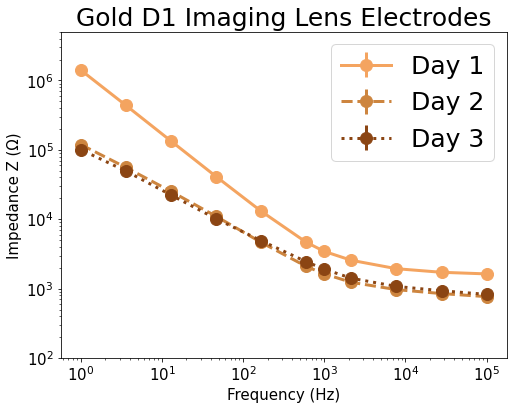

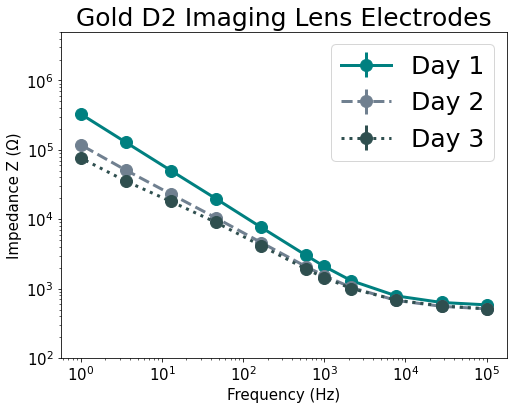

In [78]:
colors1 = ["sandybrown", "teal", "cornflowerblue", "firebrick"]
colors2 = ["peru", "slategray", "royalblue", "maroon"]
colors3 = ["saddlebrown", "darkslategray", "navy", "dimgray"]


# Gold Data
plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(8,6))

data_1mm = gold_data_all[:2]
data_2mm = gold_data_all[2:]

# Silver 1mm
data = data_1mm
print("Original Data Shape: (electrode, timepoint, sample, fs) ", np.shape(data))
data_mean = np.mean(data, axis=0) # mean across electrodes
output = np.mean(data_mean, axis=1) # mean across repeated samples
output_sd = np.std(data_mean, axis=1) # std across repeated samples

# gold_1mm_output = np.mean(data_mean, axis=1) # mean across repeated samples
# gold_1mm_output_sd = np.std(data_mean, axis=1) # std across repeated samples

# plt.errorbar(fs, output[0], yerr=output_sd[0], fmt='o-', color="gold", label="Day 1",linewidth=3, markersize=12)
# plt.errorbar(fs, output[1], yerr=output_sd[1], fmt='o-', color="orange", label="Day 2",linewidth=3, markersize=12)
# plt.errorbar(fs, output[2], yerr=output_sd[2], fmt='o-', color="brown", label="Day 3",linewidth=3, markersize=12)


plt.errorbar(fs, output[0], yerr=output_sd[0], fmt='o-', color=colors1[0], label="Day 1",linewidth=3, markersize=12)
plt.errorbar(fs, output[1], yerr=output_sd[1], fmt='o--', color=colors2[0], label="Day 2",linewidth=3, markersize=12)
plt.errorbar(fs, output[2], yerr=output_sd[2], fmt='o:', color=colors3[0], label="Day 3",linewidth=3, markersize=12)


plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=25)
plt.title("Gold D1 Imaging Lens Electrodes",fontsize=25)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance Z (Ω)")
plt.ylim([100,5000000])
plt.savefig("fig1", dpi=300)

plt.show()

plt.figure(figsize=(8,6))

# Silver 2mm
data = data_2mm
data_mean = np.mean(data, axis=0) # mean across electrodes
output = np.mean(data_mean, axis=1) # mean across repeated samples
output_sd = np.std(data_mean, axis=1) # std across repeated samples

# gold_2mm_output = np.mean(data_mean, axis=1) # mean across repeated samples
# gold_2mm_output_sd = np.std(data_mean, axis=1) # std across repeated samples

# plt.errorbar(fs, output[0], yerr=output_sd[0], fmt='o-', color="gold", label="Day 1",linewidth=3, markersize=12)
# plt.errorbar(fs, output[1], yerr=output_sd[1], fmt='o-', color="orange", label="Day 2",linewidth=3, markersize=12)
# plt.errorbar(fs, output[2], yerr=output_sd[2], fmt='o-', color="brown", label="Day 3",linewidth=3, markersize=12)


plt.errorbar(fs, output[0], yerr=output_sd[0], fmt='o-', color=colors1[1], label="Day 1",linewidth=3, markersize=12)
plt.errorbar(fs, output[1], yerr=output_sd[1], fmt='o--', color=colors2[1], label="Day 2",linewidth=3, markersize=12)
plt.errorbar(fs, output[2], yerr=output_sd[2], fmt='o:', color=colors3[1], label="Day 3",linewidth=3, markersize=12)


plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=25)
plt.ylim([100,5000000])

plt.title("Gold D2 Imaging Lens Electrodes",fontsize=25)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance Z (Ω)")
plt.savefig("fig2", dpi=300)

plt.show()


# plt.plot(fs, output[0], marker = "o", color="yellow", label="Day 1")
# plt.plot(fs, output[2], marker = "o", color="orange", label="Day 2")
# plt.plot(fs, output[4], marker = "o", color="brown", label="Day 3")

Original Data Shape: (electrode, timepoint, sample, fs)  (2, 5, 2, 11)


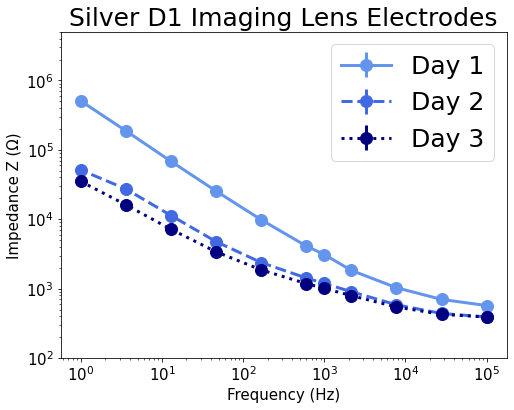

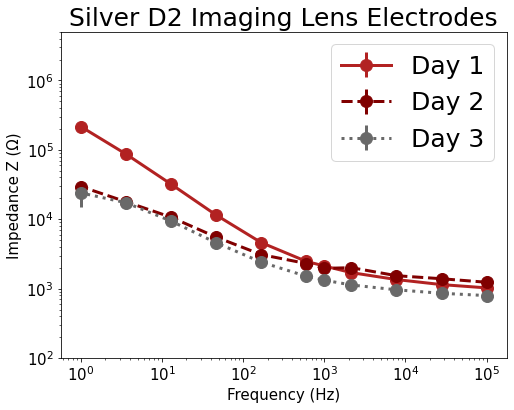

In [79]:
# Silver Data

plt.figure(figsize=(8,6))

data_1mm = silver_data_all[:2]
data_2mm = silver_data_all[2:]

# Silver 1mm
data = data_1mm
print("Original Data Shape: (electrode, timepoint, sample, fs) ", np.shape(data))
data_mean = np.mean(data, axis=0) # mean across electrodes
output = np.mean(data_mean, axis=1) # mean across repeated samples
output_sd = np.std(data_mean, axis=1) # std across repeated samples

# plt.errorbar(fs, output[0], yerr=output_sd[0], fmt='o-', color="lightblue", label="Day 1",linewidth=3, markersize=12)
# plt.errorbar(fs, output[1], yerr=output_sd[1], fmt='o-', color="cornflowerblue", label="Day 2",linewidth=3, markersize=12)
# plt.errorbar(fs, output[2], yerr=output_sd[2], fmt='o-', color="blue", label="Day 3",linewidth=3, markersize=12)

plt.errorbar(fs, output[0], yerr=output_sd[0], fmt='o-', color=colors1[2], label="Day 1",linewidth=3, markersize=12)
plt.errorbar(fs, output[1], yerr=output_sd[1], fmt='o--', color=colors2[2], label="Day 2",linewidth=3, markersize=12)
plt.errorbar(fs, output[2], yerr=output_sd[2], fmt='o:', color=colors3[2], label="Day 3",linewidth=3, markersize=12)


plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=25)
plt.ylim([100,5000000])
plt.title("Silver D1 Imaging Lens Electrodes",fontsize=25)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance Z (Ω)")
plt.savefig("fig3", dpi=300)

plt.show()

plt.figure(figsize=(8,6))


# Silver 2mm
data = data_2mm
data_mean = np.mean(data, axis=0) # mean across electrodes
output = np.mean(data_mean, axis=1) # mean across repeated samples
output_sd = np.std(data_mean, axis=1) # std across repeated samples

# plt.errorbar(fs, output[0], yerr=output_sd[0], fmt='o-', color="lightblue", label="Day 1",linewidth=3, markersize=12)
# plt.errorbar(fs, output[1], yerr=output_sd[1], fmt='o-', color="cornflowerblue", label="Day 2",linewidth=3, markersize=12)
# plt.errorbar(fs, output[2], yerr=output_sd[2], fmt='o-', color="blue", label="Day 3",linewidth=3, markersize=12)

plt.errorbar(fs, output[0], yerr=output_sd[0], fmt='o-', color=colors1[3], label="Day 1",linewidth=3, markersize=12)
plt.errorbar(fs, output[1], yerr=output_sd[1], fmt='o--', color=colors2[3], label="Day 2",linewidth=3, markersize=12)
plt.errorbar(fs, output[2], yerr=output_sd[2], fmt='o:', color=colors3[3], label="Day 3",linewidth=3, markersize=12)


plt.yscale('log')
plt.xscale('log')
plt.legend(fontsize=25)
plt.ylim([100,5000000])
plt.title("Silver D2 Imaging Lens Electrodes",fontsize=25)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Impedance Z (Ω)")
plt.savefig("fig4", dpi=300)
plt.show()


# plt.plot(fs, output[0], marker = "o", color="yellow", label="Day 1")
# plt.plot(fs, output[2], marker = "o", color="orange", label="Day 2")
# plt.plot(fs, output[4], marker = "o", color="brown", label="Day 3")

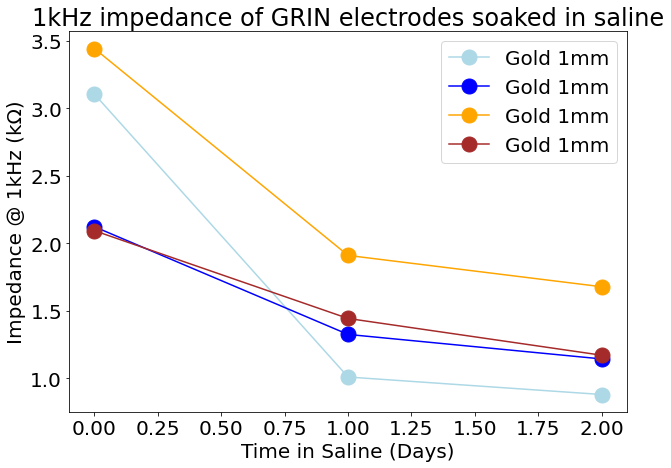

In [64]:
## Same plot but remove 2 timepoints!!!

time_hours = [0,18,24,42,48]
time_days = np.array([0,18,24,42,48])/24
time = np.delete(time_days,1)
time = np.delete(time,2)

plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 20})

# Silver

# 1mm
y_vals = np.delete(np.mean(silver_z[:2],axis=0)/1000, 1)
err_vals = np.delete(np.std(silver_z[:2],axis=0)/1000, 1)

y_vals = np.delete(y_vals, 2)
err_vals = np.delete(err_vals, 2)

plt.plot(time, y_vals, "-o", color="lightblue", label="Gold 1mm", markersize=15)


# plt.errorbar(time, y_vals, yerr=err_vals, 
#           fmt="o-", color="lightblue", label="Silver 1mm", capsize=5, markersize=15)

# 2mm
y_vals = np.delete(np.mean(silver_z[2:],axis=0)/1000, 1)
err_vals = np.delete(np.std(silver_z[2:],axis=0)/1000, 1)

y_vals = np.delete(y_vals, 2)
err_vals = np.delete(err_vals, 2)

plt.plot(time, y_vals, "-o", color="blue", label="Gold 1mm", markersize=15)


# plt.errorbar(time, y_vals, yerr=err_vals, 
#           fmt="o-", color="blue", label="Silver 2mm", capsize=5, markersize=15)


# Gold

# 1mm
y_vals = np.delete(np.mean(gold_z[:2],axis=0)/1000, 1)
err_vals = np.delete(np.std(gold_z[:2],axis=0)/1000, 1)

y_vals = np.delete(y_vals, 2)
err_vals = np.delete(err_vals, 2)

plt.plot(time, y_vals, "-o", color="orange", label="Gold 1mm", markersize=15)

# plt.errorbar(time, y_vals, yerr=err_vals, 
#           fmt="o-", color="orange", label="Gold 1mm", capsize=5, markersize=15)

# 2mm
y_vals = np.delete(np.mean(gold_z[2:],axis=0)/1000, 1)
err_vals = np.delete(np.std(gold_z[2:],axis=0)/1000, 1)

y_vals = np.delete(y_vals, 2)
err_vals = np.delete(err_vals, 2)

plt.plot(time, y_vals, "-o", color="brown", label="Gold 1mm", markersize=15)

# plt.errorbar(time, y_vals, yerr=err_vals, 
#           fmt="o-", color="brown", label="Gold 2mm", capsize=5, markersize=15)



plt.title("1kHz impedance of GRIN electrodes soaked in saline")
plt.legend()
# plt.grid()
plt.xlabel("Time in Saline (Days)")
plt.ylabel("Impedance @ 1kHz (kΩ)")
plt.show()

